As the title of the notebook indicates, the purpose of this document 
is to design a list of criteria that any ME measure we pick must 
fulfill.

A word on **notation**:  
- We write $m_i(t)$ for motion energy on trial $i$ at time $t$.  
- We write $\langle m(t)\rangle_i$ to mean the average across trials, at time $t$.  
- We write $\langle m_i\rangle_t$ to mean the time average, for trial $i$.  
- We write $M$ for the double expectation, along trial and time dimensions.  
- We write add subscript $^j$ to label specific measure definitions.
- We write the sign function as $\rm sign$, and dismiss the fact that ${\rm sign}(0)=0$

Furthermore, we use the following variables for stimulus parameters:

In [19]:
from IPython.display import HTML, display
html_table = '<table style="width:40%"> <tr> <th><font size="4">Variable</font></th> <th><font size="4">Meaning</font></th> </tr> <tr> <td><font size="4">c</font></td> <td><font size="4">coherence</font></td></tr> <tr> <td><font size="4">n</font></td> <td><font size="4">number of dots</font></td> </tr><tr> <td><font size="4">n_c(t;i)</font></td> <td><font size="4">number of coherent dots</font></td>   </tr></table>'
display(HTML(html_table))

Variable,Meaning
c,coherence
n,number of dots
n_c(t;i),number of coherent dots


# List of criteria  a ME measure must meet
* Scalar quantity that evolves with time
* On average, the sign of the quantity matches the true direction of motion of the coherent dots
* For fixed coherence (and other params), the fluctuations of the signal are small
* The behaviors illustrated in the plots below should hold

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

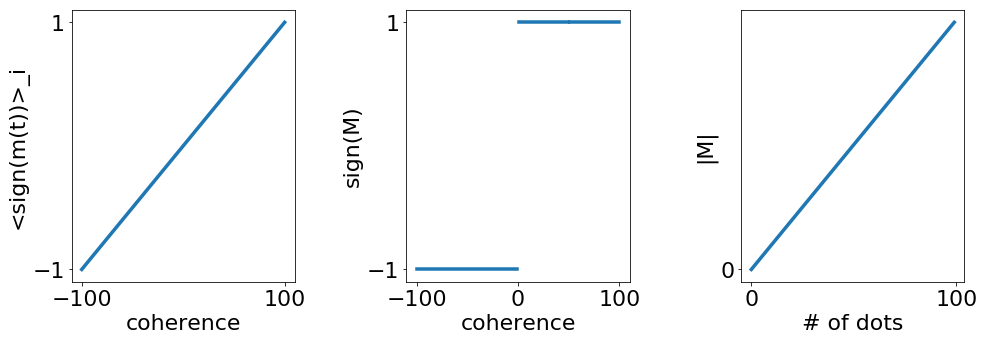

In [56]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h) # figure size 
plt.rcParams.update({'font.size': 22}) # font size on axes
plt.subplots_adjust(wspace=0.5) # horizontal space between panels
lw = 3.5

ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)


# plot 1
c = np.arange(201) - 100
rescaled_c = c/100
ax1.plot(c,rescaled_c, linewidth=lw)
ax1.set_xlabel('coherence')
ax1.set_ylabel('<sign(m(t))>_i')
ax1.set_yticks([-1,1])
ax1.set_xticks([-100,100])

# plot 2
signed_M = np.sign(rescaled_c)

# for ref on masks below, see
# https://stackoverflow.com/a/5940970
masked_coh = np.ma.masked_equal(c,50)
masked_signed_M = np.ma.masked_equal(signed_M,0)

ax2.plot(masked_coh, masked_signed_M, linewidth=lw)
ax2.set_xlabel('coherence')
ax2.set_ylabel('sign(M)')
ax2.set_yticks([-1,1])

# plot 3
numDots = np.arange(100)
ax3.plot(numDots,numDots, linewidth=lw)
ax3.set_xlabel('# of dots')
ax3.set_ylabel('|M|')
ax3.set_yticks([0])
ax3.set_xticks([0,len(numDots)])

# Measure 1
$$M:=\left(\frac{c}{100}-0.5\right)*n$$

# Measure 2
$$m_i(t):=n_c(t;i)$$